In [13]:
import pandas as pd
data = pd.read_csv('UFO_modificado.csv')

<Axes: xlabel='duration (seconds)', ylabel='shape'>

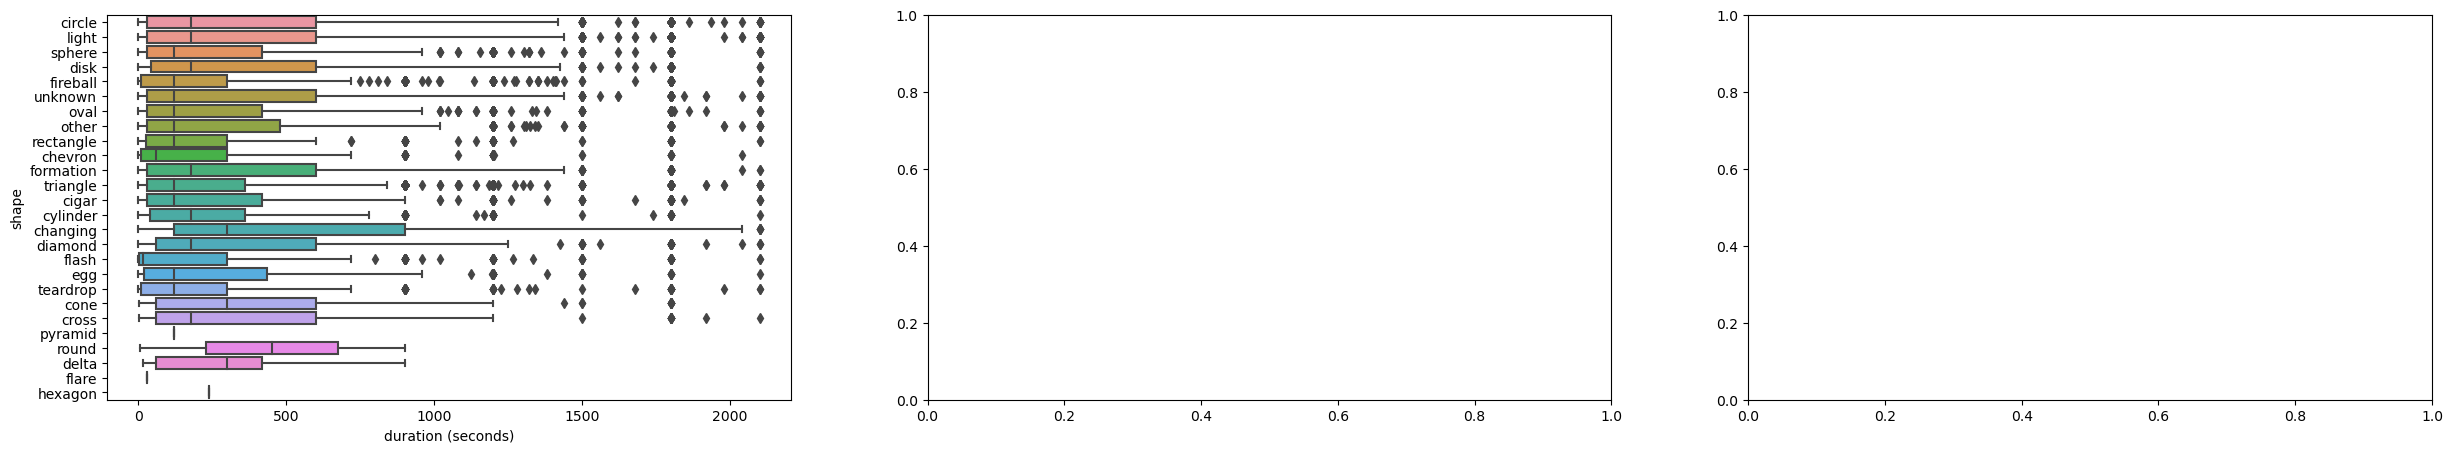

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(30,5))
sns.boxplot(x="duration (seconds)", y="shape", data=data, ax=axs[0])


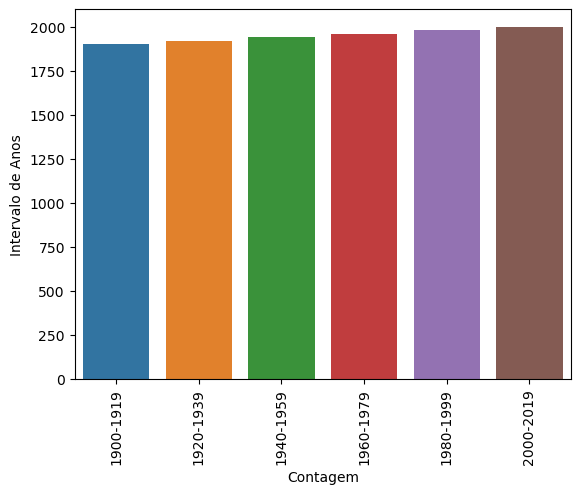

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Extrair o ano de cada data
df['Ano'] = pd.to_datetime(df['datetime']).dt.year

# Contar ocorrências de cada ano
df_counts = df['Ano'].value_counts().reset_index()
df_counts.columns = ['Ano', 'Contagem']

# Agrupar os anos em intervalos de 20 anos
df_counts['Intervalo'] = df_counts['Ano'] // 20 * 20

# Somar a contagem de ocorrências para cada intervalo
df_counts_grouped = df_counts.groupby('Intervalo')['Contagem'].sum().reset_index()

# Ordenar os intervalos em ordem crescente
df_counts_grouped = df_counts_grouped.sort_values('Intervalo')

# Definir os rótulos dos intervalos
intervalos = [f"{intervalo}-{intervalo+19}" for intervalo in df_counts_grouped['Intervalo']]

# Criar gráfico de barras usando Seaborn
sns.barplot(x='Contagem', y='Intervalo', data=df_counts_grouped)

# Definir rótulos dos eixos
plt.xlabel('Contagem')
plt.ylabel('Intervalo de Anos')

# Definir os rótulos das barras
plt.xticks(np.arange(len(df_counts_grouped)), intervalos, rotation=90)

# Exibir gráfico
plt.show()


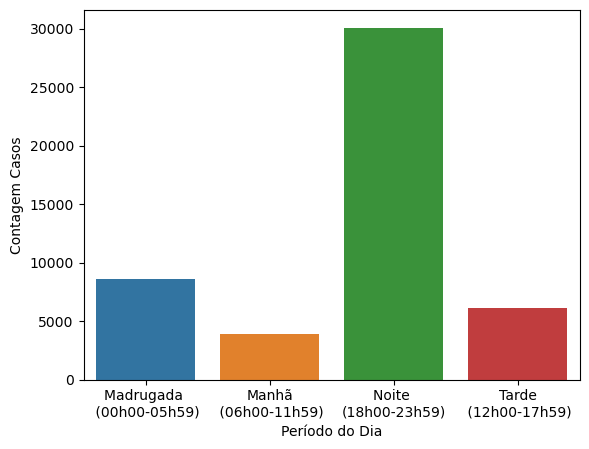

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Converter a coluna de horário para objetos datetime
df['Hora'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S').dt.time

# Função para mapear a hora para os agrupamentos
def mapear_periodo(hora):
    if hora >= datetime.strptime('06:00:00', '%H:%M:%S').time() and hora < datetime.strptime('12:00:00', '%H:%M:%S').time():
        return 'Manhã\n (06h00-11h59)'
    elif hora >= datetime.strptime('12:00:00', '%H:%M:%S').time() and hora < datetime.strptime('18:00:00', '%H:%M:%S').time():
        return 'Tarde\n (12h00-17h59)'
    elif hora >= datetime.strptime('18:00:00', '%H:%M:%S').time() or hora < datetime.strptime('00:00:00', '%H:%M:%S').time():
        return 'Noite \n(18h00-23h59)'
    else:
        return 'Madrugada \n (00h00-05h59)'

# Mapear a hora para os agrupamentos
df['Periodo'] = df['Hora'].apply(mapear_periodo)

# Contar ocorrências de cada período
df_counts = df['Periodo'].value_counts().reset_index()
df_counts.columns = ['Periodo', 'Contagem Casos']

# Ordenar os períodos para exibição no gráfico
df_counts = df_counts.sort_values('Periodo')

# Criar gráfico de barras usando Seaborn
sns.barplot(x='Periodo', y='Contagem Casos', data=df_counts)

# Definir rótulos dos eixos
plt.xlabel('Período do Dia')
plt.ylabel('Contagem Casos')

# Exibir gráfico
plt.show()


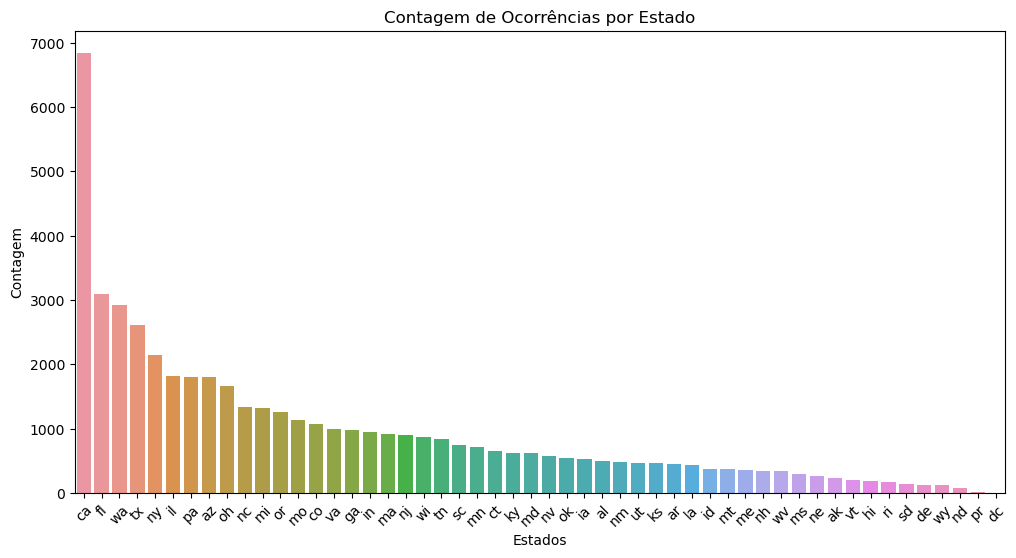

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Contar ocorrências de cada estado
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['Estado', 'Contagem']

# Ordenar os estados por contagem decrescente
state_counts = state_counts.sort_values('Contagem', ascending=False)

# Criar gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado', y='Contagem', data=state_counts)

# Definir rótulos dos eixos e título do gráfico
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Estado')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir gráfico
plt.show()

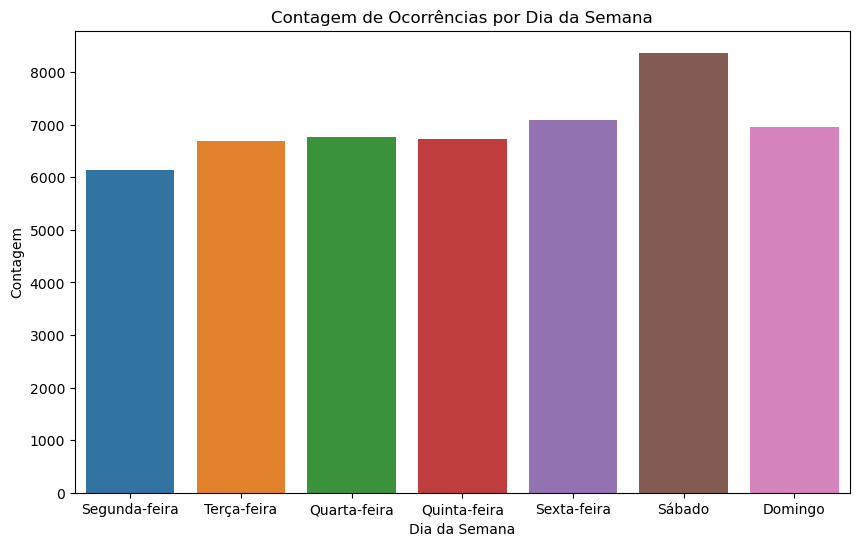

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Contar ocorrências de cada dia da semana
weekday_counts = df['dia_da_semana'].value_counts().reset_index()
weekday_counts.columns = ['Dia da Semana', 'Contagem']

# Ordenar os dias da semana na ordem correta
weekday_counts['Dia da Semana'] = pd.Categorical(weekday_counts['Dia da Semana'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
weekday_counts = weekday_counts.sort_values('Dia da Semana')

# Mapear os nomes dos dias da semana para português
weekday_map = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
weekday_counts['Dia da Semana'] = weekday_counts['Dia da Semana'].map(weekday_map)

# Criar gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Dia da Semana', y='Contagem', data=weekday_counts)

# Definir rótulos dos eixos e título do gráfico
plt.xlabel('Dia da Semana')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Dia da Semana')

# Exibir gráfico
plt.show()

In [32]:
import pandas as pd

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Calcular a mediana da coluna 'duration (seconds)'
mediana_segundos = df['duration (seconds)'].median()

# Exibir o resultado em segundos
print(f"Mediana em segundos: {mediana_segundos:.2f}")

Mediana em segundos: 120.00


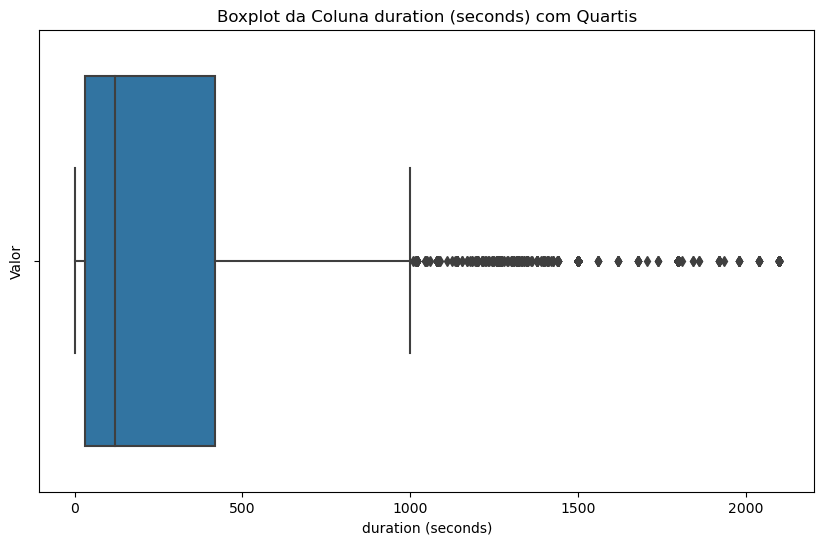

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Calcular os quartis da coluna 'duration (seconds)'
q1 = df['duration (seconds)'].quantile(0.25)
mediana = df['duration (seconds)'].median()
q3 = df['duration (seconds)'].quantile(0.75)

# Criar o boxplot com os quartis
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration (seconds)'])

# Adicionar anotações com os valores dos quartis
plt.annotate(f'Q1: {q1}', xy=(0.25, q1), xytext=(0.25, q1 - 100), ha='center', color='red')
plt.annotate(f'Mediana: {mediana}', xy=(0.5, mediana), xytext=(0.5, mediana - 100), ha='center', color='green')
plt.annotate(f'Q3: {q3}', xy=(0.75, q3), xytext=(0.75, q3 - 100), ha='center', color='blue')

# Definir rótulos dos eixos e título do gráfico
plt.xlabel('duration (seconds)')
plt.ylabel('Valor')
plt.title('Boxplot da Coluna duration (seconds) com Quartis')

# Exibir o gráfico
plt.show()

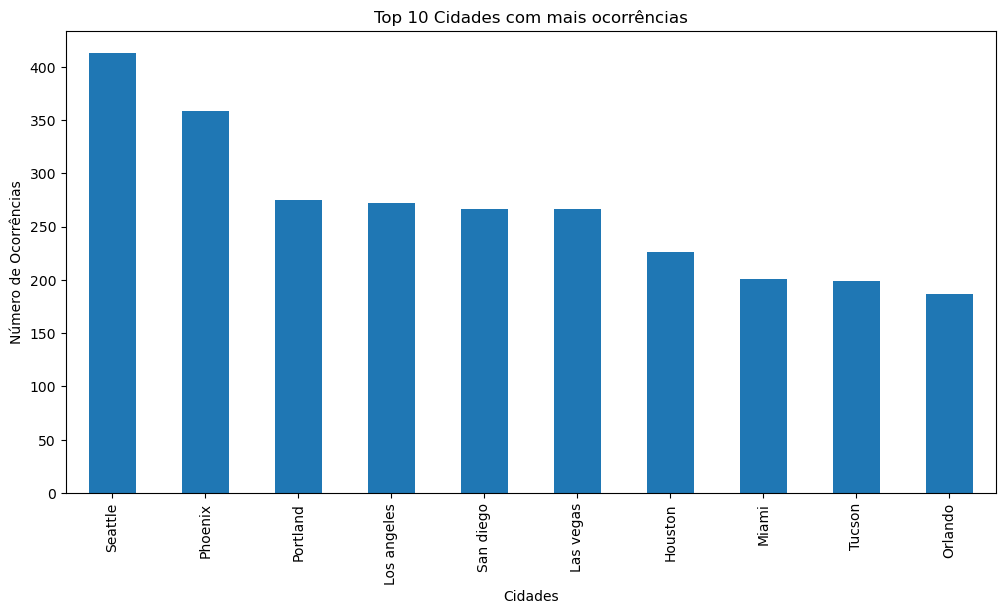

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Contar o número de ocorrências por cidade
ocorrencias = df['city'].value_counts()

# Filtrar as cidades que tiveram mais de uma ocorrência
cidades_mais_ocorrencias = ocorrencias[ocorrencias > 1]

# Selecionar somente as 10 primeiras cidades com mais ocorrências
top_10_cidades = cidades_mais_ocorrencias.head(10)

# Criar o gráfico de barras das 10 primeiras cidades com mais ocorrências
plt.figure(figsize=(12, 6))
top_10_cidades.plot(kind='bar')

# Definir rótulos dos eixos e título do gráfico
plt.xlabel('Cidades')
plt.ylabel('Número de Ocorrências')
plt.title('Top 10 Cidades com mais ocorrências')

# Exibir o gráfico
plt.show()

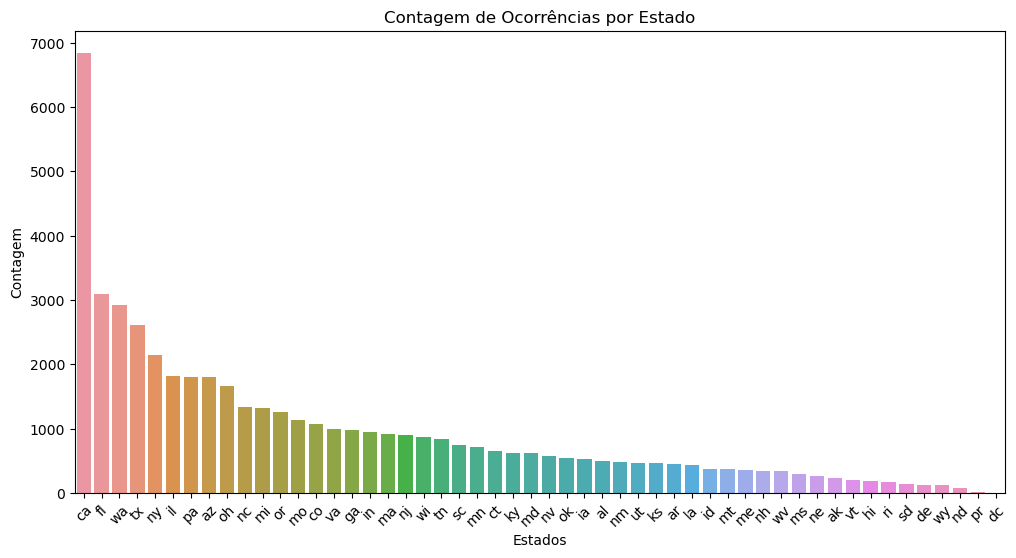

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados da tabela em um DataFrame
df = pd.read_csv('UFO_modificado.csv')

# Contar ocorrências de cada estado
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['Estado', 'Contagem']

# Ordenar os estados por contagem decrescente
state_counts = state_counts.sort_values('Contagem', ascending=False)

# Criar gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado', y='Contagem', data=state_counts)

# Definir rótulos dos eixos e título do gráfico
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Estado')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir gráfico
plt.show()